# Importing required Modules and Libraries

In [204]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [205]:
df_train= pd.read_csv(r'C:\Users\Jarvis\Downloads\train.csv')
df_train.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy


In [206]:
df_test= pd.read_csv(r'C:\Users\Jarvis\Downloads\test.csv')
df_test.head()

,User_ID,Description,Browser_Used,Device_Used
0,id80132,Looking for a motel in close proximity to TV t...,Firefox,Mobile
1,id80133,Walking distance to Madison Square Garden and ...,InternetExplorer,Desktop
2,id80134,Visited Seattle on business. Spent - nights in...,IE,Tablet
3,id80135,This hotel location is excellent and the rooms...,Edge,Mobile
4,id80136,This hotel is awesome I love the service Antho...,Mozilla,Mobile


In [207]:
df_train.shape

(38932, 5)

In [208]:
df_test.shape

(29404, 4)

In [209]:
df_train.columns

Index(['User_ID', 'Description', 'Browser_Used', 'Device_Used', 'Is_Response'], dtype='object')

# Removing irrelevant columns 

In [210]:
# Dataset has extra columns- Remove 
# Renaming v1 and v2
df_train.drop(columns=['User_ID','Browser_Used','Device_Used'],axis=1,inplace=True)

df_train.rename(columns={'Is_Response':'label','Description':'message'},inplace=True)

In [211]:
# Dataset has extra columns- Remove 
# Renaming v1 and v2
df_test.drop(columns=['User_ID','Browser_Used','Device_Used'],axis=1,inplace=True)

df_test.rename(columns={'Description':'message'},inplace=True)

In [212]:
df_train.columns

Index(['message', 'label'], dtype='object')

In [213]:
df_test.columns

Index(['message'], dtype='object')

# Dependent Variable Analysis

In [214]:
print ('happy and not happy counts','\n',df_train.label.value_counts())

happy and not happy counts 
 happy        26521
not happy    12411
Name: label, dtype: int64


In [215]:
#Ratio
print ('happy ratio = ', round(len(df_train[df_train['label']=='happy']) / len(df_train.label),2)*100,'%')
print ('not happy ratio  = ', round(len(df_train[df_train['label']=='not happy']) / len(df_train.label),2)*100,'%')

happy ratio =  68.0 %
not happy ratio  =  32.0 %


# Adding new column 'Length'

In [216]:
#New column for Length of message
df_train['length'] = df_train.message.str.len()
df_train.head(2)

,message,label,length
0,The room was kind of clean but had a VERY stro...,not happy,248
1,I stayed at the Crown Plaza April -- - April -...,not happy,1077


# Label Encoding

In [217]:
#Label coding 0 and 1
df_train['label'].replace({'happy':0,'not happy':1},inplace=True)

# Lower case conversion

In [218]:
# Convert all messages to lower case
df_train['message'] = df_train['message'].str.lower()

# Regular Expression 

In [219]:
# Replace email addresses with 'email'
df_train['message'] = df_train['message'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')

# Replace URLs with 'webaddress'
df_train['message'] = df_train['message'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
df_train['message'] = df_train['message'].str.replace(r'£|\$', 'dollers')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
df_train['message'] = df_train['message'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumber')

    
# Replace numbers with 'numbr'
df_train['message'] = df_train['message'].str.replace(r'\d+(\.\d+)?', 'numbr')

In [220]:
#New column for Length of message
df_test['length'] = df_test.message.str.len()
df_test.head(2)

,message,length
0,Looking for a motel in close proximity to TV t...,676
1,Walking distance to Madison Square Garden and ...,588


In [221]:
# Convert all messages to lower case
df_test['message'] = df_test['message'].str.lower()

In [222]:
# Replace email addresses with 'email'
df_test['message'] = df_test['message'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')

# Replace URLs with 'webaddress'
df_test['message'] = df_test['message'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
df_test['message'] = df_test['message'].str.replace(r'£|\$', 'dollers')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
df_test['message'] = df_test['message'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumber')

    
# Replace numbers with 'numbr'
df_test['message'] = df_test['message'].str.replace(r'\d+(\.\d+)?', 'numbr')

# Punctuation Removal

In [223]:
# Remove punctuation
df_train['message'] = df_train['message'].str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
df_train['message'] = df_train['message'].str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
df_train['message'] = df_train['message'].str.replace(r'^\s+|\s+?$', '')

In [224]:
# Remove punctuation
df_test['message'] = df_test['message'].str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
df_test['message'] = df_test['message'].str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
df_test['message'] = df_test['message'].str.replace(r'^\s+|\s+?$', '')

In [225]:
df_train.head()

,message,label,length
0,the room was kind of clean but had a very stro...,1,248
1,i stayed at the crown plaza april april the st...,1,1077
2,i booked this hotel through hotwire at the low...,1,1327
3,stayed here with husband and sons on the way t...,0,502
4,my girlfriends and i stayed here to celebrate ...,1,1613


In [226]:
df_test.head()

,message,length
0,looking for a motel in close proximity to tv t...,676
1,walking distance to madison square garden and ...,588
2,visited seattle on business spent nights in th...,863
3,this hotel location is excellent and the rooms...,778
4,this hotel is awesome i love the service antho...,255


# Stopwords Removal

In [227]:
# Remove stopwords
import string
import nltk
from nltk.corpus import  stopwords

stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])

df_train['message'] = df_train['message'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

In [228]:
# New column (clean_length) after puncuations,stopwords removal
df_train['clean_length'] = df_train.message.str.len()
df_train.head()

,message,label,length,clean_length
0,room kind clean strong smell dogs generally av...,1,248,140
1,stayed crown plaza april april staff friendly ...,1,1077,649
2,booked hotel hotwire lowest price could find g...,1,1327,791
3,stayed husband sons way alaska cruise loved ho...,0,502,333
4,girlfriends stayed celebrate th birthdays plan...,1,1613,981


In [229]:
# New column (clean_length) after puncuations,stopwords removal
df_test['clean_length'] = df_test.message.str.len()
df_test.head()

,message,length,clean_length
0,looking for a motel in close proximity to tv t...,676,661
1,walking distance to madison square garden and ...,588,573
2,visited seattle on business spent nights in th...,863,837
3,this hotel location is excellent and the rooms...,778,757
4,this hotel is awesome i love the service antho...,255,252


In [230]:
# Total length removal
print ('Original Length', df_train.length.sum())
print ('Clean Length', df_train.clean_length.sum())

Original Length 33725876
Clean Length 20532879


In [231]:
# Total length removal
print ('Original Length', df_test.length.sum())
print ('Clean Length', df_test.clean_length.sum())

Original Length 25550974
Clean Length 24406214


# Distribution of 'messages' through graph

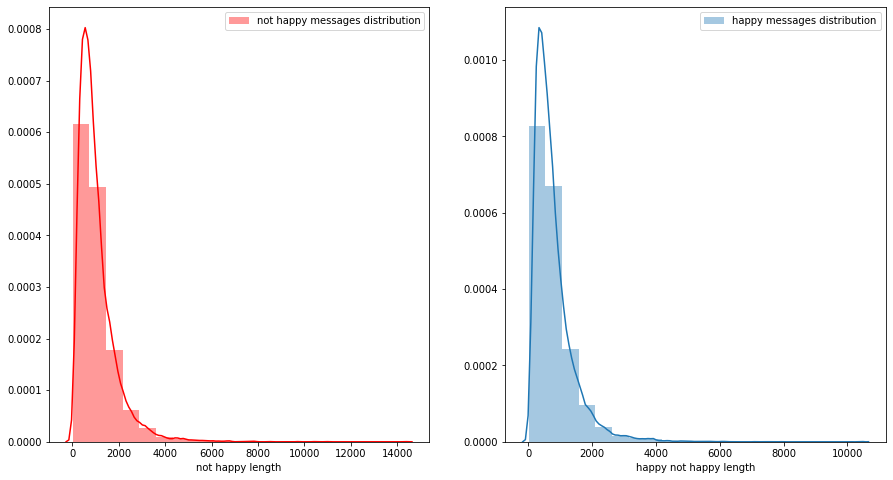

In [232]:
# Message distribution BEFORE cleaning
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(df_train[df_train['label']==1]['length'],bins=20,ax=ax[0],label='not happy messages distribution',color='r')

ax[0].set_xlabel('not happy length')
ax[0].legend()

sns.distplot(df_train[df_train['label']==0]['length'],bins=20,ax=ax[1],label='happy messages distribution')
ax[1].set_xlabel('happy not happy length')
ax[1].legend()

plt.show()

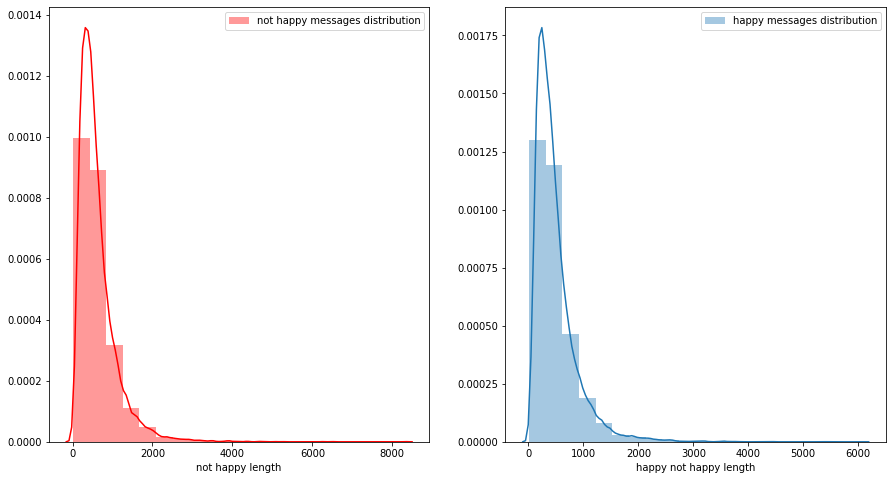

In [233]:
# Message distribution BEFORE cleaning
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(df_train[df_train['label']==1]['clean_length'],bins=20,ax=ax[0],label='not happy messages distribution',color='r')

ax[0].set_xlabel('not happy length')
ax[0].legend()

sns.distplot(df_train[df_train['label']==0]['clean_length'],bins=20,ax=ax[1],label='happy messages distribution')
ax[1].set_xlabel('happy not happy length')
ax[1].legend()

plt.show()

# Word Cloud for 'Not Happy'

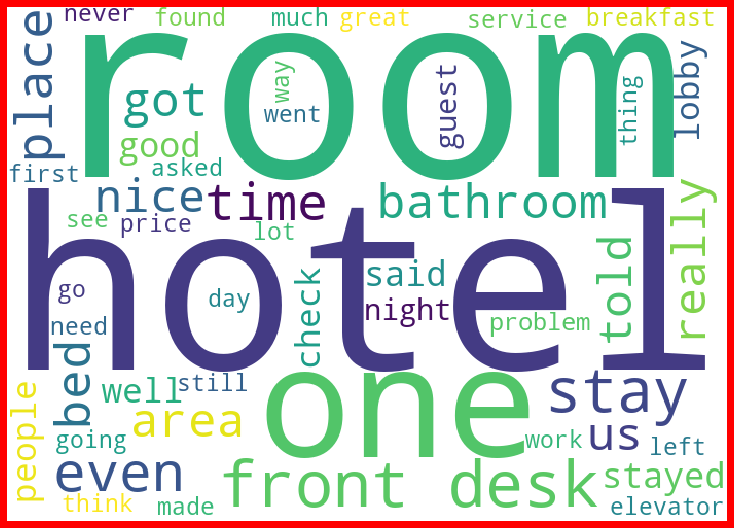

In [234]:
#Getting sense of loud words in 'not happy' 
from wordcloud import WordCloud


NotHappy = df_train['message'][df_train['label']==1]

NotHappy_cloud = WordCloud(width=700,height=500,background_color='white',max_words=50).generate(' '.join(NotHappy))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(NotHappy_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# Word Cloud for 'Happy'

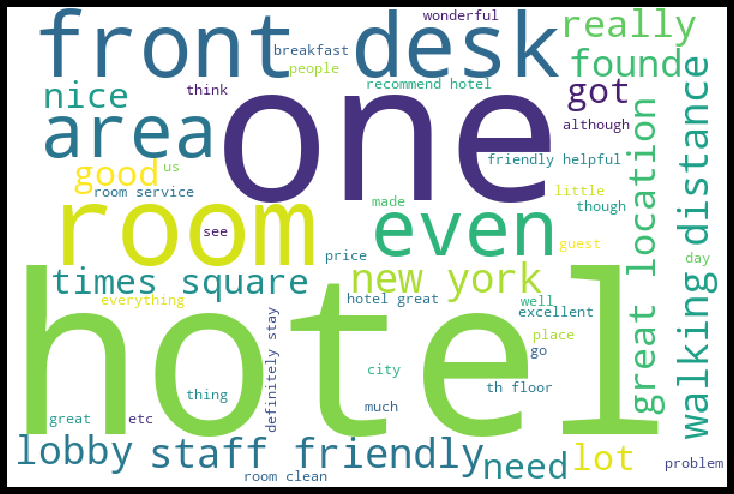

In [235]:
#Getting sense of loud words in happy

happy = df_train['message'][df_train['label']==0]
happy_cloud = WordCloud(width=600,height=400,background_color='white',max_words=50).generate(' '.join(happy))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(happy_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# Changing messages in Vectors

In [236]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [237]:
tf_vec = TfidfVectorizer()

In [238]:
features = tf_vec.fit_transform(df_train['message'])

In [239]:
X = features
y = df_train['label']

In [240]:
X.shape

(38932, 45899)

In [241]:
y.shape

(38932,)

# Train-Test-Split

In [242]:
from sklearn.model_selection import train_test_split

In [243]:
# Train and predict
X_train,x_test,Y_train,y_test = train_test_split(X,y,random_state=42)


In [244]:
X_train.shape,x_test.shape,Y_train.shape,y_test.shape

((29199, 45899), (9733, 45899), (29199,), (9733,))

# Classification Model Building 

In [245]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [246]:
from sklearn.metrics import confusion_matrix, classification_report

In [247]:
from sklearn.naive_bayes import MultinomialNB

In [248]:
model=[LogisticRegression(),MultinomialNB(),SVC(),DecisionTreeClassifier(),RandomForestClassifier()]

In [249]:
for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    predm=m.predict(x_test)
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n ')

0.8816397821843214
[[6250  387]
 [ 765 2331]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.92      6637
           1       0.86      0.75      0.80      3096

    accuracy                           0.88      9733
   macro avg       0.87      0.85      0.86      9733
weighted avg       0.88      0.88      0.88      9733


 
0.8076646460495223
[[6581   56]
 [1816 1280]]
              precision    recall  f1-score   support

           0       0.78      0.99      0.88      6637
           1       0.96      0.41      0.58      3096

    accuracy                           0.81      9733
   macro avg       0.87      0.70      0.73      9733
weighted avg       0.84      0.81      0.78      9733


 
0.8852357957464296
[[6249  388]
 [ 729 2367]]
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      6637
           1       0.86      0.76      0.81      3096

    accuracy                          

# Confusion Matrix

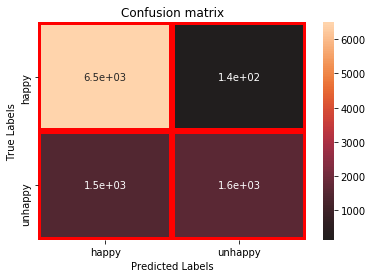

In [250]:
# plot confusion matrix heatmap
conf_mat = confusion_matrix(y_test,predm)

ax=plt.subplot()

sns.heatmap(conf_mat,annot=True,ax=ax,linewidths=5,linecolor='r',center=0)

ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')

ax.set_title('Confusion matrix')
ax.xaxis.set_ticklabels(['happy','unhappy'])
ax.yaxis.set_ticklabels(['happy','unhappy'])
plt.show()

In [251]:
conf_mat

array([[6493,  144],
       [1482, 1614]], dtype=int64)